In [1]:
#allows plots to be displayed in iPython notebook
%matplotlib inline

#imports necessary packages to run program
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import *

#reads the csv file for the restaruants and saves it in dataframe called df
dfPlayByPlay = pd.read_csv('nflplaybyplay2015.csv', dtype=unicode)
dfStandings = pd.read_csv('nflstandings2015.csv', dtype=unicode)
dfStandings = dfStandings.set_index(['team'])

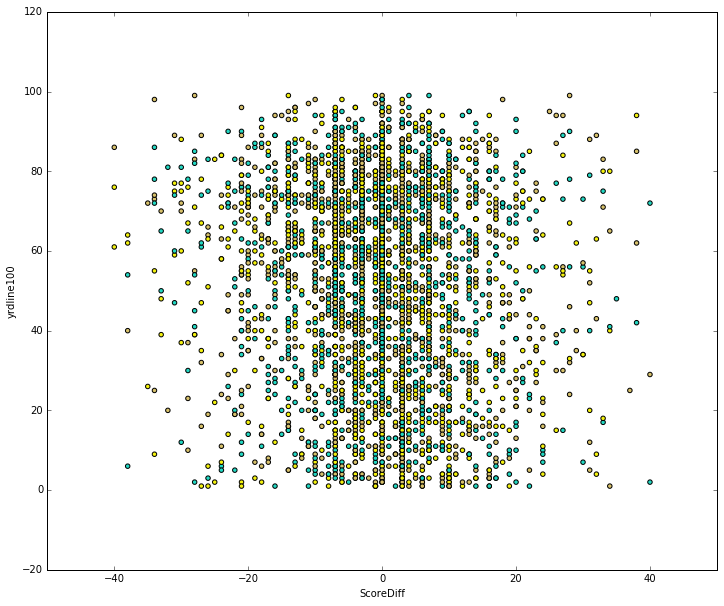

In [2]:
df_4th_down = dfPlayByPlay[['Date','qtr','down','TimeSecs','yrdline100','ydstogo','PlayType','ScoreDiff']].copy()

down_mask = (df_4th_down['down']=='4')
df_4th_down = df_4th_down[down_mask]

no_play_mask = (df_4th_down['PlayType']!='No Play')
df_4th_down = df_4th_down[no_play_mask]

timeout_mask = (df_4th_down['PlayType']!='Timeout')
df_4th_down = df_4th_down[timeout_mask]

kneel_mask = (df_4th_down['PlayType']!='QB Kneel')
df_4th_down = df_4th_down[kneel_mask]

df_4th_down.replace("Pass","Go For It", inplace=True)
df_4th_down.replace("Run","Go For It", inplace=True)
df_4th_down.replace("Sack","Go For It", inplace=True)

df_4th_down['ScoreDiff']=df_4th_down['ScoreDiff'].astype(int)
df_4th_down['yrdline100']=df_4th_down['yrdline100'].astype(int)

groups = df_4th_down.groupby('PlayType')
colors = pd.tools.plotting._get_standard_colors(len(groups), color_type='random')

#fig, ax = plt.subplots()
#for name, group in groups:
#    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
#ax.legend()

#plt.show()

df_4th_down.plot(x='ScoreDiff',y='yrdline100',kind='scatter', c=colors,figsize=(12,10))

## Run Side Distribution

In [3]:
df_run=dfPlayByPlay[['posteam','DefensiveTeam','RushAttempt','RunLocation','Yards.Gained']].copy()

run_mask = (df_run['RushAttempt']=='1')
df_run = df_run[run_mask]

na_mask = (df_run['RunLocation']!='NA')
df_run = df_run[na_mask]

df_run['Yards.Gained']=df_run['Yards.Gained'].astype(int)

df_run_dist = pd.crosstab(df_run['DefensiveTeam'],df_run['RunLocation'],df_run['Yards.Gained'],aggfunc=[np.mean])

df_run_dist['range']=df_run_dist.T.max()-df_run_dist.T.min()

df_run_dist = pd.merge(df_run_dist,dfStandings,left_index=True, right_index=True)

df_run_dist.columns = ['left', 'middle', 'right', 'range', 'win', 'loss']
df_run_dist

C:\Users\rmaas\Anaconda2\lib\site-packages\pandas\tools\merge.py:205: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,left,middle,right,range,win,loss
DefensiveTeam,,,,,,
ARI,4.824561,4.078125,3.620690,1.203872,13,3
ATL,4.849673,5.696429,3.359788,2.336640,8,8
BAL,4.623529,4.654545,3.613636,1.040909,5,11
BUF,4.735714,4.142857,5.134328,0.991471,8,8
CAR,3.872340,4.834951,3.648148,1.186803,15,1
CHI,4.326425,4.910714,5.053892,0.727467,6,10
CIN,4.619835,4.060976,4.511278,0.558859,12,4
CLE,5.179487,4.815385,4.162011,1.017476,3,13
DAL,3.410405,4.322034,5.857143,2.446738,4,12


In [4]:
lin_reg = pd.ols(x=df_run_dist['range'], y=df_run_dist['win'])
lin_reg.r2

C:\Users\rmaas\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


0.0032649675269390555

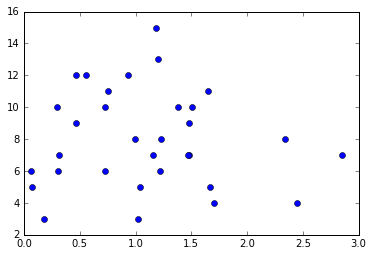

In [5]:
plt.plot(df_run_dist['range'], df_run_dist['win'], 'o')

## Rush YPG Effect vs Pass YPG Effect

In [6]:
df_ypg=dfPlayByPlay[['posteam','PassAttempt', 'RushAttempt','Yards.Gained']].copy()

df_ypg['PassAttempt']=df_ypg['PassAttempt'].astype(int)
df_ypg['RushAttempt']=df_ypg['RushAttempt'].astype(int)
pass_or_run_mask = ((df_ypg['RushAttempt']+df_ypg['PassAttempt'])==1)
df_ypg = df_ypg[pass_or_run_mask]

df_ypg['Yards.Gained']=df_ypg['Yards.Gained'].astype(int)

df_ypg['PassYds'] = df_ypg['PassAttempt'] * df_ypg['Yards.Gained']
df_ypg['RushYds'] = df_ypg['RushAttempt'] * df_ypg['Yards.Gained']

df_ypg = pd.pivot_table(df_ypg, index='posteam', values=['RushYds','PassYds'],aggfunc=np.sum)

df_ypg['Pass_YPG'] = df_ypg['PassYds']/16.0
df_ypg['Rush_YPG'] = df_ypg['RushYds']/16.0

df_ypg = pd.merge(df_ypg,dfStandings,left_index=True, right_index=True)

df_ypg

,PassYds,RushYds,Pass_YPG,Rush_YPG,win,loss
posteam,,,,,,
ARI,4995,1951,312.1875,121.9375,13,3
ATL,4761,1698,297.5625,106.1250,8,8
BAL,4629,1506,289.3125,94.1250,5,11
BUF,3786,2470,236.6250,154.3750,8,8
CAR,3975,2305,248.4375,144.0625,15,1
CHI,3981,1870,248.8125,116.8750,6,10
CIN,4325,1843,270.3125,115.1875,12,4
CLE,4294,1547,268.3750,96.6875,3,13
DAL,3885,1909,242.8125,119.3125,4,12


In [7]:
lin_reg_pass = pd.ols(x=df_ypg['Pass_YPG'], y=df_ypg['win'])
lin_reg_rush = pd.ols(x=df_ypg['Rush_YPG'], y=df_ypg['win'])

In [8]:
lin_reg_pass.r2

0.00015290662076794526

In [9]:
lin_reg_rush.r2

0.2183261854933285

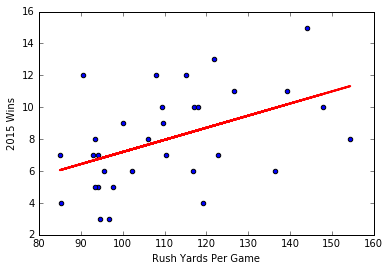

In [10]:
y_expected = lin_reg_rush.beta['intercept'] + df_ypg['Rush_YPG']*lin_reg_rush.beta['x']

scatter(df_ypg['Rush_YPG'], df_ypg['win'])
plot(df_ypg['Rush_YPG'], y_expected, linewidth=2, color='red')
xlabel('Rush Yards Per Game')
ylabel('2015 Wins')
show()

## Turnover Margin

In [11]:
df_turnover = dfPlayByPlay[['posteam','DefensiveTeam','InterceptionThrown','Fumble']].copy()

df_turnover['InterceptionThrown']=df_turnover['InterceptionThrown'].astype(int)
df_turnover['Fumble']=df_turnover['Fumble'].astype(int)
turnover_mask = ((df_turnover['InterceptionThrown']+df_turnover['Fumble'])==1)
df_turnover = df_turnover[turnover_mask]

df_turnover_off = df_turnover.copy()
df_turnover_def = df_turnover.copy()

df_turnover_off['total'] = (df_turnover_off['InterceptionThrown'] + df_turnover_off['Fumble'])*(-1)
df_turnover_def['total'] = (df_turnover_def['InterceptionThrown'] + df_turnover_def['Fumble'])*(1)

df_turnover_off = pd.pivot_table(df_turnover_off, index='posteam', values='total', aggfunc=np.sum)
df_turnover_def = pd.pivot_table(df_turnover_def, index='DefensiveTeam', values='total', aggfunc=np.sum)

df_turnover_off = pd.DataFrame(df_turnover_off)
df_turnover_def = pd.DataFrame(df_turnover_def)

df_turnover = pd.merge(df_turnover_off, df_turnover_def, left_index=True, right_index=True)
df_turnover.columns = ['giveaways','takeaways']
df_turnover['giveaways']=df_turnover['giveaways'].astype(int)
df_turnover['takeaways']=df_turnover['takeaways'].astype(int)
df_turnover['margin'] = df_turnover['giveaways'] + df_turnover['takeaways']

df_turnover = pd.merge(df_turnover,dfStandings,left_index=True, right_index=True)

df_turnover


,giveaways,takeaways,margin,win,loss
posteam,,,,,
ARI,-35,49,14,13,3
ATL,-46,31,-15,8,8
BAL,-33,21,-12,5,11
BUF,-30,34,4,8,8
CAR,-24,52,28,15,1
CHI,-30,22,-8,6,10
CIN,-26,32,6,12,4
CLE,-39,28,-11,3,13
DAL,-43,24,-19,4,12


In [12]:
lin_reg_turnover = pd.ols(x=df_turnover['margin'], y=df_turnover['win'])

In [13]:
lin_reg_turnover.r2

0.63825095807033372

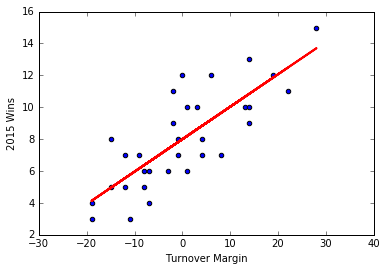

In [14]:
y_expected = lin_reg_turnover.beta['intercept'] + df_turnover['margin']*lin_reg_turnover.beta['x']

scatter(df_turnover['margin'], df_turnover['win'])
plot(df_turnover['margin'], y_expected, linewidth=2, color='red')
xlabel('Turnover Margin')
ylabel('2015 Wins')
show()

## Pass Length Analysis

In [43]:
df_pass = dfPlayByPlay[['posteam','DefensiveTeam', 'Passer', 'PassAttempt', 'PassOutcome', 'PassLength', 'PassLocation', 'InterceptionThrown', 'Yards.Gained']].copy()

df_pass['PassAttempt']=df_pass['PassAttempt'].astype(int)
df_pass['Yards.Gained']=df_pass['Yards.Gained'].astype(int)

pass_mask = (df_pass['PassAttempt']==1)
df_pass = df_pass[pass_mask]

NA_mask = (df_pass['PassLength']!='NA')
df_pass = df_pass[NA_mask]

NA_mask = (df_pass['PassLocation']!='NA')
df_pass = df_pass[NA_mask]

NA_mask = (df_pass['PassOutcome']!='NA')
df_pass = df_pass[NA_mask]

df_pass_complete = df_pass[['PassOutcome', 'PassLength']].copy()
df_pass_complete = pd.crosstab(index=df_pass_complete['PassLength'],columns=df_pass_complete['PassOutcome'], normalize='index')

df_pass_length = pd.pivot_table(df_pass, index='PassLength',values='Yards.Gained',aggfunc=[np.mean,np.std])
df_pass_length = pd.DataFrame(df_pass_length)

df_pass_length = pd.merge(df_pass_length, df_pass_complete, left_index=True, right_index=True)
df_pass_length = df_pass_length[['mean', 'std', 'Complete']]
df_pass_length.columns = ['Avg_Yards', 'SD_Yards', 'Completion_%']
df_pass_length['EV'] = df_pass_length['Avg_Yards'] * df_pass_length['Completion_%']
df_pass_length

,Avg_Yards,SD_Yards,Completion_%,EV
PassLength,,,,
Deep,10.980856,15.967442,0.377293,4.143003
Short,6.215583,7.457896,0.672891,4.182411


In [37]:
df_pass_complete

PassOutcome,Complete,Incomplete Pass
PassLength,,
Deep,0.377293,0.622707
Short,0.672891,0.327109
